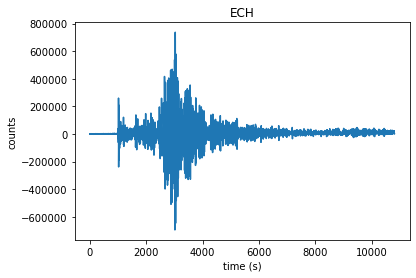

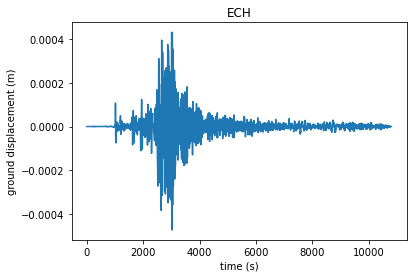

In [1]:
#================================================================
#   this script illustrates how to download seismic data 
#   from international data services
#   based on FDSN web services and ObsPhy
#   the data are than corrected for the instrument response
#   and converted into physical units (displacement ...)
#================================================================


#------------------------ importing basic packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal


#------------------------ importing ObsPy functions
from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime


plt.close('all')

    
#------------------------ selecting an FDSN datacenter
#client = Client('IRIS')
client = Client('RESIF')

#---------------------------------------------------- defining start time for the data
#   an example of a resent earthquake in Alaska is selected
#   https://earthquake.usgs.gov/earthquakes/eventpage/us6000c9hg/executive
#   one can play with this usgs web site:
#   https://earthquake.usgs.gov/earthquakes/search/
#   to select different earthquakes

tstart = UTCDateTime("2020-10-19T20:50:00.000")


#-------------------- defining duration of the downloaded time series in sec (3 hours in this example)
t_duration = 3*60*60


#--------------- selecting a station
#   here we look for Geoscope stations (network code "G") :
#   http://geoscope.ipgp.fr/index.php/en/stations/station-map
#   a closest station to Paris is "ECH"

#-------------- downloading 6 hours of data from one selected station
#   vertical "BHZ" component is downloaded
st1 = client.get_waveforms("G", "ECH", "*", "BHZ", tstart, tstart + t_duration, attach_response=True)



#-------------- extracting a trace from the stream
s1 = st1[0]




#------------ detrending time series
st1.detrend()



#-------- plotting raw data
dt = s1.stats.delta
npts = s1.stats.npts
time1 = dt*(np.linspace(1,npts,npts)-1)

plt.figure()
plt.plot(time1,s1.data)
plt.title(s1.stats.station)
plt.xlabel('time (s)')
plt.ylabel('counts')
plt.show()


#------------------ correcting for instrument respomnce
#   DISP produce displacemetn in meters (VEL and ACC could be also used)
#   https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html#obspy.core.trace.Trace.remove_response

pre_filt = (0.005, 0.006, 30.0, 35.0)                   # defining spectral band
st1.remove_response(output='DISP', pre_filt=pre_filt)

#-------- plotting corrected seismogram
plt.figure()
plt.plot(time1,s1.data)
plt.title(s1.stats.station)
plt.xlabel('time (s)')
plt.ylabel('ground displacement (m)')
plt.show()
